In [1]:
# いくつかの変数からなる二次関数を線形制約の下で最適化（最小化ないしは最大化）するのが二次計画法
# 以下の問題を解いてみた
# https://optimization.mccormick.northwestern.edu/index.php/Quadratic_programming

In [2]:
import numpy as np
import cvxopt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress = True)

In [3]:
P = [
    [6, 2],
    [2, 2]
]

In [4]:
q = [1, 6]

In [5]:
G = [
    [-2, -3],
    [-1, 0],
    [0, -1]
]

In [6]:
h = [-4, 0, 0]

In [7]:
G_matrix = cvxopt.matrix(np.array(G), tc = 'd')
h_matrix = cvxopt.matrix(np.array(h), tc = 'd')
P_matrix = cvxopt.matrix(np.array(P), tc = 'd')
q_matrix = cvxopt.matrix(np.array(q), tc = 'd')

In [8]:
sol = cvxopt.solvers.qp(P_matrix, q_matrix, G_matrix, h_matrix)

     pcost       dcost       gap    pres   dres
 0:  2.4299e+00  1.1771e+01  1e+01  2e+00  1e+00
 1:  9.5508e+00  8.1393e+00  1e+00  4e-16  9e-16
 2:  9.2569e+00  9.2273e+00  3e-02  2e-16  1e-16
 3:  9.2501e+00  9.2498e+00  3e-04  2e-16  3e-16
 4:  9.2500e+00  9.2500e+00  3e-06  2e-16  7e-16
Optimal solution found.


In [9]:
sol

{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 2.997761365150236e-06,
 'relative gap': 3.2408239084251574e-07,
 'primal objective': 9.250000683093692,
 'dual objective': 9.249997685332323,
 'primal infeasibility': 2.237726045655905e-16,
 'dual infeasibility': 6.53001761191703e-16,
 'primal slack': 2.2769760767723438e-07,
 'dual slack': 7.247042613695453e-07,
 'iterations': 4}

In [10]:
status = sol['status']
print(status)

optimal


In [11]:
X =  sol['x']

In [12]:
for x in X:
    print('x:',x)

x: 0.5000006267290817
x: 0.999999658079815


In [13]:
print(sol["primal objective"])

9.250000683093692


In [14]:
X[0]

0.5000006267290817

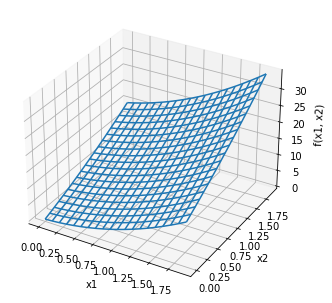

In [15]:
def func(x1, x2):
    return 3 * x1**2 + x2**2 + 2 * x1 * x2 + x1 + 6 * x2

x1 = np.arange(0, 2, 0.1)
x2 = np.arange(0, 2, 0.1)

X1, X2 = np.meshgrid(x1, x2)
Z = func(X1, X2)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.plot_wireframe(X1, X2, Z)
plt.show()